In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [4]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


In [5]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

First 10 Train images in MNIST dataset



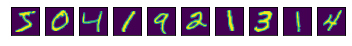


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])

In [7]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [8]:
model_1 = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
            keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

model_2 = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
            keras.layers.MaxPool2D((2,2)),                                                  # layer 2
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
            keras.layers.MaxPool2D((2,2)),                                                  # layer 4
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])                                # layer 5

model_3 = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
            keras.layers.MaxPool2D((2,2)),                                                  # layer 2
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
            keras.layers.MaxPool2D((2,2)),                                                  # layer 5
            keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])                                # layer 7

In [12]:
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                O

In [13]:
model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
model_1.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4999 - accuracy: 0.9413
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0831 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0698 - accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0611 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0536 - accuracy: 0.9838


In [15]:
model_2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4396 - accuracy: 0.9456
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0688 - accuracy: 0.9799
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0541 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0486 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0424 - accuracy: 0.9869


In [16]:
model_3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1994 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0560 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0446 - accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0379 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0341 - accuracy: 0.9898


In [17]:
test_loss_1, accuracy_1 = model_1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss_1)
print('Test accuracy :', accuracy_1)

313/313 - 1s - loss: 0.1361 - accuracy: 0.9693 - 1s/epoch - 5ms/step

Test loss :  0.1361219733953476
Test accuracy : 0.9692999720573425


In [18]:
test_loss_2, accuracy_2 = model_2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss_2)
print('Test accuracy :', accuracy_2)

313/313 - 2s - loss: 0.0755 - accuracy: 0.9799 - 2s/epoch - 6ms/step

Test loss :  0.07548229396343231
Test accuracy : 0.9799000024795532


In [19]:
test_loss_3, accuracy_3 = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss_3)
print('Test accuracy :', accuracy_3)

313/313 - 3s - loss: 0.0466 - accuracy: 0.9873 - 3s/epoch - 8ms/step

Test loss :  0.04659147560596466
Test accuracy : 0.9872999787330627


In [20]:
test_images = tf.cast(test_images, tf.float32)
pred_1 = model_1.predict(test_images)
pred_2 = model_2.predict(test_images)
pred_3 = model_3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 3s 8ms/step


In [21]:
print('Prediction : ', pred_1.shape)
print('Test labels : ', test_labels.shape)
print('Prediction : ', pred_2.shape)
print('Test labels : ', test_labels.shape)
print('Prediction : ', pred_3.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)
Prediction :  (10000, 10)
Test labels :  (10000,)
Prediction :  (10000, 10)
Test labels :  (10000,)


In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [24]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

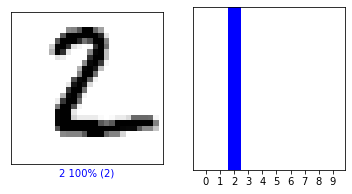

In [25]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_1,  test_labels)
plt.show()

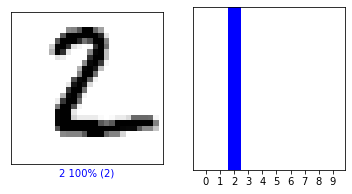

In [26]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_2, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_2,  test_labels)
plt.show()

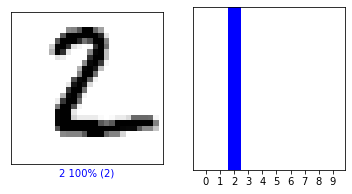

In [31]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_3,  test_labels)
plt.show()

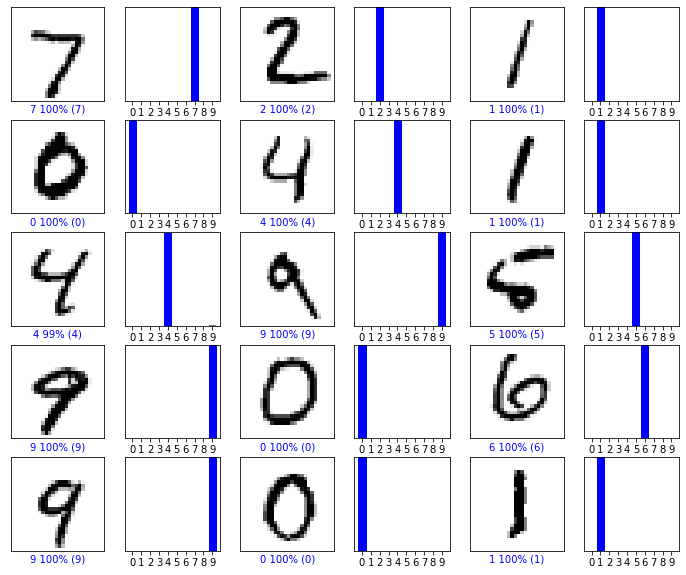

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_1, test_labels)
plt.show()

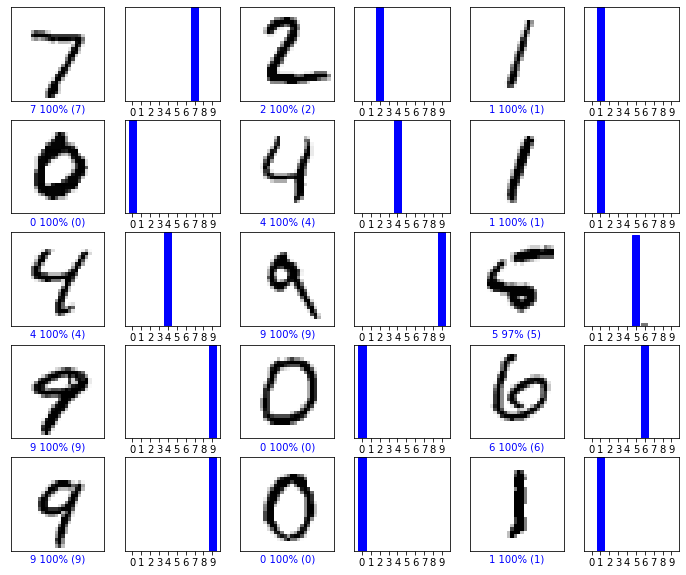

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_2, test_labels)
plt.show()

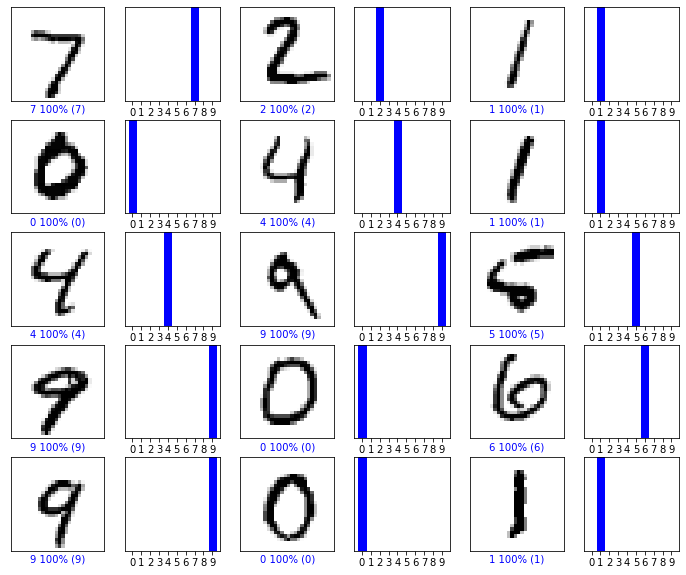

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_3, test_labels)
plt.show()

In [35]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [38]:
index_1 = error_mnist(pred_1, test_labels)
index_slice_1 = index_1[:10]
print(index_1[:10])

index_2 = error_mnist(pred_2, test_labels)
index_slice_2 = index_2[:10]
print(index_2[:10])

index_3 = error_mnist(pred_3, test_labels)
index_slice_3 = index_3[:10]
print(index_3[:10])

[96, 119, 139, 151, 211, 217, 247, 266, 321, 324]
[119, 321, 449, 450, 464, 495, 542, 551, 582, 625]
[36, 247, 321, 326, 340, 445, 447, 557, 582, 646]


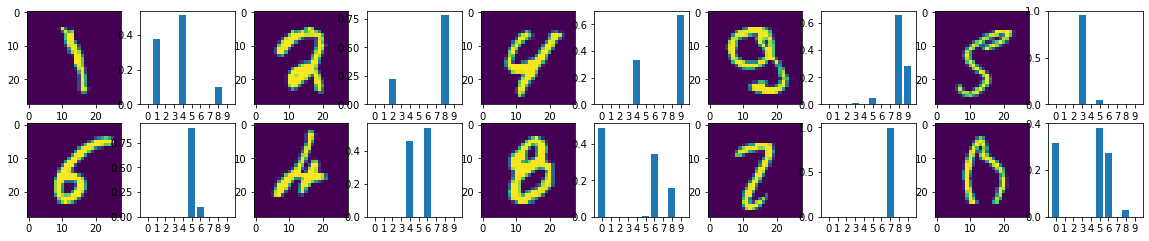

In [39]:
plot_error(index_slice_1, pred_1, test_labels)

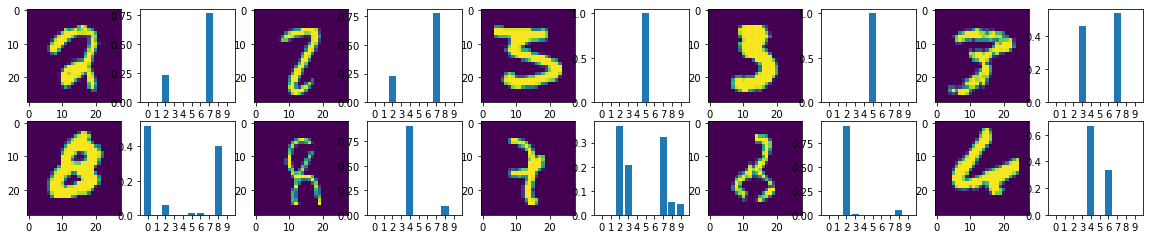

In [40]:
plot_error(index_slice_2, pred_2, test_labels)

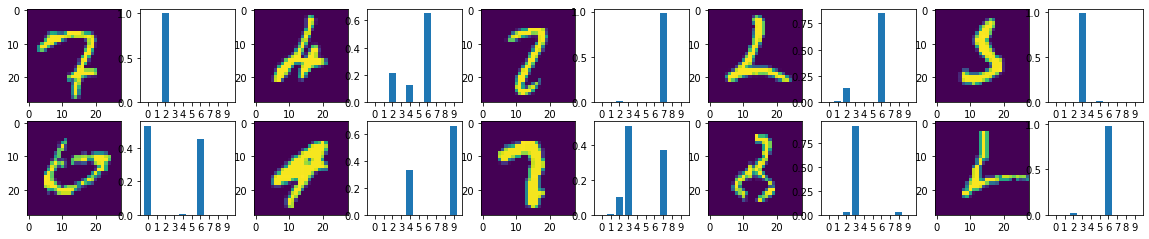

In [41]:
plot_error(index_slice_3, pred_3, test_labels)

In [ ]:
DONE